okay...let's try to import some data and then clean it up using pandas in order to fit a curve
https://www.ishares.com/us/products/239566/ishares-iboxx-investment-grade-corporate-bond-etf

In [147]:
import pandas as pd

In [158]:
df = pd.read_csv('C:/Users/dstoc/Documents/Python Scripts/First Project/USIG_holdings.csv')

In [159]:
print(df.head(10))

                                Name                   Sector   Asset Class  \
0     BLK CSH FND TREASURY SL AGENCY  Cash and/or Derivatives  Money Market   
1       ANHEUSER-BUSCH COMPANIES LLC    Consumer Non-Cyclical  Fixed Income   
2                    CVS HEALTH CORP    Consumer Non-Cyclical  Fixed Income   
3        GOLDMAN SACHS GROUP INC/THE                  Banking  Fixed Income   
4                   T-MOBILE USA INC           Communications  Fixed Income   
5  PFIZER INVESTMENT ENTERPRISES PTE    Consumer Non-Cyclical  Fixed Income   
6           WARNERMEDIA HOLDINGS INC           Communications  Fixed Income   
7               BANK OF AMERICA CORP                  Banking  Fixed Income   
8                          BOEING CO            Capital Goods  Fixed Income   
9                           AT&T INC           Communications  Fixed Income   

    Market Value  Weight (%) Notional Value      Par Value      CUSIP  \
0  87,579,000.05        0.98  87,579,000.05  87,579,000.0

In [160]:
print(df.tail)

<bound method NDFrame.tail of                                        Name  \
0            BLK CSH FND TREASURY SL AGENCY   
1              ANHEUSER-BUSCH COMPANIES LLC   
2                           CVS HEALTH CORP   
3               GOLDMAN SACHS GROUP INC/THE   
4                          T-MOBILE USA INC   
...                                     ...   
9714       OCCIDENTAL PETROLEUM CORPORATION   
9715                  LPL HOLDINGS INC 144A   
9716  CITIGROUP GLOBAL MARKETS HOLDINGS MTN   
9717                 The Nature Conservancy   
9718                   QUANTA SERVICES INC.   

                                  Sector   Asset Class   Market Value  \
0                Cash and/or Derivatives  Money Market  87,579,000.05   
1                  Consumer Non-Cyclical  Fixed Income  10,347,113.59   
2                  Consumer Non-Cyclical  Fixed Income   8,431,615.66   
3                                Banking  Fixed Income   7,109,942.33   
4                         Communications

In [161]:
list(df.columns)

['Name',
 'Sector',
 'Asset Class',
 'Market Value',
 'Weight (%)',
 'Notional Value',
 'Par Value',
 'CUSIP',
 'ISIN',
 'SEDOL',
 'Price',
 'Location',
 'Exchange',
 'Currency',
 'Duration',
 'YTM (%)',
 'FX Rate',
 'Maturity',
 'Coupon (%)',
 'Mod. Duration',
 'Yield to Call (%)',
 'Yield to Worst (%)',
 'Real Duration',
 'Real YTM (%)',
 'Market Currency',
 'Accrual Date',
 'Effective Date']

In [172]:
df2 = df[['Name',
 'Sector',
 'Weight (%)',
 'Notional Value',
 'CUSIP',
 'Price',
 'Duration',
 'YTM (%)',
 'Maturity',
 'Coupon (%)',
 'Mod. Duration',
 'Yield to Worst (%)']]

df2 = df2.iloc[1:len(df2),]

In [173]:
from datetime import datetime
date_str = "1-Feb-46"
date_format = "%d-%b-%y"

# Convert the date string to a datetime object
date_obj = datetime.strptime(date_str, date_format)

# Get the current date as a datetime object
current_date = datetime.now()

# Calculate the difference in days
years_away = (date_obj - current_date).days / 365

print(years_away)

22.673972602739727


In [174]:
import pandas as pd
from datetime import datetime

# Create a sample DataFrame with a 'Date' column
data = {'Date': ['13-May-19', '15-Jun-19', '22-Jul-19']}
df_example = pd.DataFrame(data)

# Define the date format
date_format = "%d-%b-%y"

# Define a function to convert a date string to the number of days away
def convert_to_days(date_str):
    date_obj = datetime.strptime(date_str, date_format)
    current_date = datetime.now()
    days_away = (date_obj - current_date).days
    return days_away

# Apply the function to the 'Date' column
df_example['Days Away'] = df_example['Date'].apply(convert_to_days)

# Print the updated DataFrame
print(df_example)


        Date  Days Away
0  13-May-19      -1485
1  15-Jun-19      -1452
2  22-Jul-19      -1415


In [175]:
import pandas as pd
from datetime import datetime, timedelta

# Create a sample DataFrame with a 'Date' column
#data = {'Date': ['13-May-19', '15-Jun-19', '22-Jul-19']}
#df = pd.DataFrame(data)

# Define the date format
date_format = "%d-%b-%y"

# Define a function to convert a date string to the number of days away
def convert_to_years(date_str):
    date_obj = datetime.strptime(date_str, date_format)
    current_date = datetime.now()
    years_away = (date_obj - current_date).days / 365

    if years_away < 0:
        years_away = years_away + 100  # Add 100 years (365.25 days per year on average)
    
    return years_away

# Apply the function to the 'Date' column
df2['MaturityYears'] = df2['Maturity'].apply(convert_to_years)

# Print the updated DataFrame
print(df2)


                                       Name  \
1              ANHEUSER-BUSCH COMPANIES LLC   
2                           CVS HEALTH CORP   
3               GOLDMAN SACHS GROUP INC/THE   
4                          T-MOBILE USA INC   
5         PFIZER INVESTMENT ENTERPRISES PTE   
...                                     ...   
9714       OCCIDENTAL PETROLEUM CORPORATION   
9715                  LPL HOLDINGS INC 144A   
9716  CITIGROUP GLOBAL MARKETS HOLDINGS MTN   
9717                 The Nature Conservancy   
9718                   QUANTA SERVICES INC.   

                                  Sector  Weight (%) Notional Value  \
1                  Consumer Non-Cyclical        0.12  10,347,113.59   
2                  Consumer Non-Cyclical        0.09   8,431,615.66   
3                                Banking        0.08   7,109,942.33   
4                         Communications        0.08   6,994,549.62   
5                  Consumer Non-Cyclical        0.08   6,974,796.78   
...      

In [176]:
import numpy as np
from nelson_siegel_svensson.calibrate import calibrate_ns_ols, errorfn_ns_ols
from matplotlib import pyplot as plt

In [177]:
df3 = df2.loc[df2['Sector'] == 'Communications']
df3.head

<bound method NDFrame.head of                                     Name          Sector  Weight (%)  \
4                       T-MOBILE USA INC  Communications        0.08   
6               WARNERMEDIA HOLDINGS INC  Communications        0.07   
9                               AT&T INC  Communications        0.07   
10                              AT&T INC  Communications        0.07   
27    DEUTSCHE TELEKOM INTERNATIONAL FIN  Communications        0.06   
...                                  ...             ...         ...   
9607                  VODAFONE GROUP PLC  Communications        0.00   
9673                            AT&T INC  Communications        0.00   
9694                  VODAFONE GROUP PLC  Communications        0.00   
9710                          SPRINT LLC  Communications        0.00   
9712                          SPRINT LLC  Communications        0.00   

     Notional Value      CUSIP   Price  Duration  YTM (%)   Maturity  \
4      6,994,549.62  87264ABF1   

In [178]:
df3.sort_values('MaturityYears')
df3.head(5)

,Name,Sector,Weight (%),Notional Value,CUSIP,Price,Duration,YTM (%),Maturity,Coupon (%),Mod. Duration,Yield to Worst (%),MaturityYears
4,T-MOBILE USA INC,Communications,0.08,"6,994,549.62",87264ABF1,92.54,5.86,5.18,15-Apr-30,3.88,5.88,5.18,6.863014
6,WARNERMEDIA HOLDINGS INC,Communications,0.07,"6,226,579.86",55903VBE2,79.24,13.20,6.79,15-Mar-52,5.14,13.08,6.79,28.794521
9,AT&T INC,Communications,0.07,"5,991,475.32",00206RKJ0,69.17,15.92,5.63,15-Sep-53,3.50,15.81,5.63,30.298630
10,AT&T INC,Communications,0.07,"5,930,124.31",00206RLJ9,68.45,16.19,5.70,15-Sep-55,3.55,16.02,5.70,32.298630
27,DEUTSCHE TELEKOM INTERNATIONAL FIN,Communications,0.06,"4,942,674.69",25156PAC7,120.22,5.30,5.27,15-Jun-30,8.75,5.24,5.27,7.030137


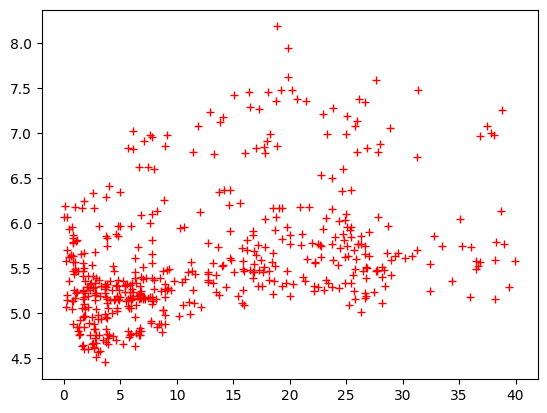

In [182]:
time = np.array(df3["MaturityYears"])
yld = np.array(df3["Yield to Worst (%)"])

plt.plot(time,yld, "r+");

In [183]:
curve, status = calibrate_ns_ols(
    time,yld, tau0=1.0
)  # starting value of 1.0 for the optimization of tau
assert status.success
curve

NelsonSiegelCurve(beta0=6.186233466626271, beta1=-0.2897318908704771, beta2=-3.066900856606175, tau=1.7043049745893468)

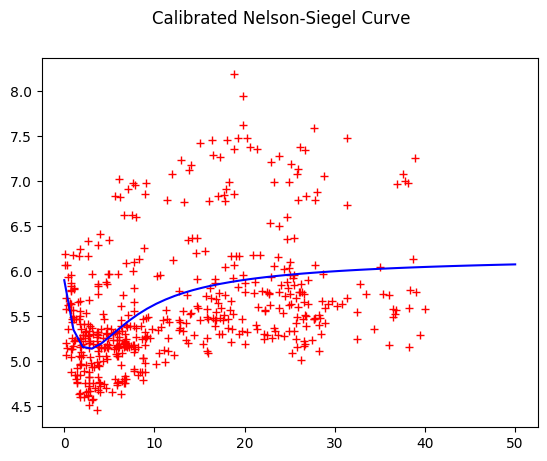

In [184]:
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.suptitle("Calibrated Nelson-Siegel Curve")
ax.plot(time, yld, "r+")
t2 = np.linspace(0, 50)
ax.plot(t2, curve(t2), "b-");

In [185]:
taus = np.linspace(0.5, 6, 300)
err = np.array([errorfn_ns_ols(tau, yld, time) for tau in taus])

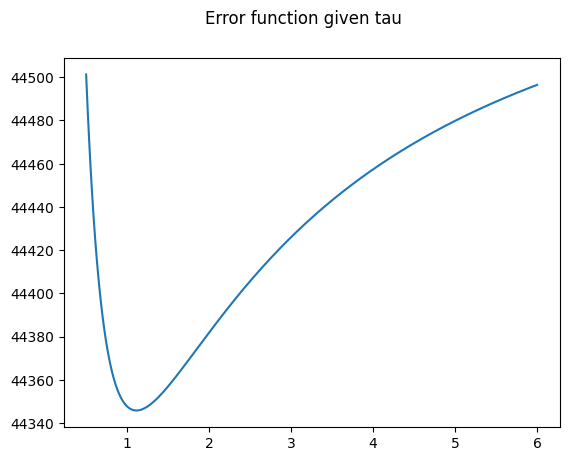

In [186]:
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.suptitle("Error function given tau")
ax.plot(taus, err);

# Calculate distance of each bond's yield from the curve

In [187]:
df3.loc[:,'Yhat'] = df3['Yield to Worst (%)'].apply(curve)



C:\Users\dstoc\AppData\Local\Temp\ipykernel_3836\1801459002.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.loc[:,'Yhat'] = df3['Yield to Worst (%)'].apply(curve)


In [190]:
df3.loc[:,'Spread to Curve'] = df3['Yield to Worst (%)'] - df3['Yhat']

# Calculate additional performance driven by compression of bond's yield to the curve
% Change in Price = - Duration x Change in Spread

In [191]:
df3.loc[:,'Implied Performance'] = df3['Duration'] * df3['Spread to Curve']

C:\Users\dstoc\AppData\Local\Temp\ipykernel_3836\1103910078.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.loc[:,'Implied Performance'] = df3['Duration'] * df3['Spread to Curve']
